In [2]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree

In [3]:

#importar datos
df = pd.read_csv('brain_stroke.csv')
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [4]:
#longitud de la base de datos
len(df)

4981

In [5]:
#mostrar valor mas bajo y alto de age
print(df['age'].min())
print(df['age'].max())


0.08
82.0


In [6]:
#mostrar valores unicos de la columna gender
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

# Limpieza de Datos: 
Los datos recopilados a menudo contienen
errores, valores atípicos o datos faltantes que pueden afectar
negativamente el análisis. En esta etapa, se realiza una limpieza de datos
rigurosa para identificar y corregir estos problemas. Esto implica eliminar
duplicados, rellenar valores faltantes y resolver discrepancias.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Podemos observar que la columna "bmi" tiene valores faltantes, por lo que procedemos a rellenarlos con la media de los valores de la columna.

In [8]:
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Transformación de Datos: 
A menudo, es necesario realizar
transformaciones en los datos para que sean adecuados para el análisis.
Esto puede incluir la normalización de datos, la creación de nuevas
características derivadas o la codificación de variables categóricas. El
objetivo es preparar los datos para su posterior análisis.

In [10]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [11]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
df['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

In [13]:
df.insert(2,'age_band', np.zeros)

In [14]:
df.loc[df['age']<=16,'age_band']=0
df.loc[(df['age']>16)&(df['age']<=32),'age_band']=1
df.loc[(df['age']>32)&(df['age']<=48),'age_band']=2
df.loc[(df['age']>48)&(df['age']<=64),'age_band']=3
df.loc[df['age']>64,'age_band']=4
df.drop(columns= "age", inplace=True)
df["age_band"]=df['age_band'].astype(str).astype(int)
df.head()

,gender,age_band,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,4,0,1,Yes,Private,Urban,228.69,36.6,0,1
1,0,4,0,1,Yes,Private,Rural,105.92,32.5,1,1
2,1,3,0,0,Yes,Private,Urban,171.23,34.4,2,1
3,1,4,1,0,Yes,Self-employed,Rural,174.12,24.0,1,1
4,0,4,0,0,Yes,Private,Urban,186.21,29.0,0,1


In [15]:
# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
df[column] = df[column] /df[column].abs().max()
df[column2] = df[column2] /df[column2].abs().max()
  
# view normalized data
display(df[column], df[column2])

0       0.841577
1       0.389784
2       0.630124
3       0.640760
4       0.685251
          ...   
4976    0.258151
4977    0.703430
4978    0.349672
4979    0.308898
4980    0.308199
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.748466
1       0.664622
2       0.703476
3       0.490798
4       0.593047
          ...   
4976    0.609407
4977    0.635992
4978    0.650307
4979    0.613497
4980    0.595092
Name: bmi, Length: 4981, dtype: float64

# Analisis y Modelado:
Aplicación de técnicas de minería de datos para analizar los datos preparados y desarrollar modelos que aborden el problema u oportunidad identificados en el proyecto.

In [16]:
#importing all the required ML packages
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

Diviendo los datos en datos de entrenamiento y datos de prueba, para poder entrenar el modelo.

In [17]:
X = df[['gender', 'age_band', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]
X[0:5]

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,0,4,0,1,0.841577,0.748466,0
1,0,4,0,1,0.389784,0.664622,1
2,1,3,0,0,0.630124,0.703476,2
3,1,4,1,0,0.640760,0.490798,1
4,0,4,0,0,0.685251,0.593047,0


In [18]:
y = df["stroke"].values

In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=5)

In [20]:
#imprimir x_trainset y_trainset
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)

(3486, 7)
(3486,)
(1495, 7)
(1495,)


In [21]:
classTree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth = 4)
classTree.fit(X_trainset,y_trainset)
predTree = classTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9498327759197325


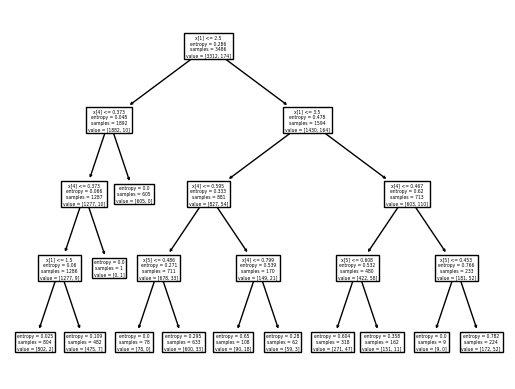

In [22]:
#aumentar tamaño del arbol
#plt.figure(figsize=(20,10))
tree.plot_tree(classTree)
plt.show()

In [38]:
model=KNeighborsClassifier(n_neighbors=5) 
#model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='ball_tree')
model.fit(X_trainset,y_trainset)
prediction2=model.predict(X_testset)
print('The accuracy of the KNN is',metrics.accuracy_score(y_testset,prediction2))

The accuracy of the KNN is 0.9444816053511705


[0.01950927 0.07597557 0.01973025 0.01886172 0.4225101  0.38088462
 0.06252846]


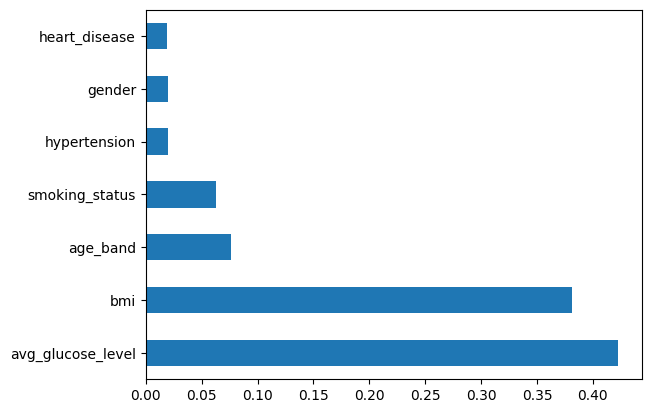

In [25]:
#graficar feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

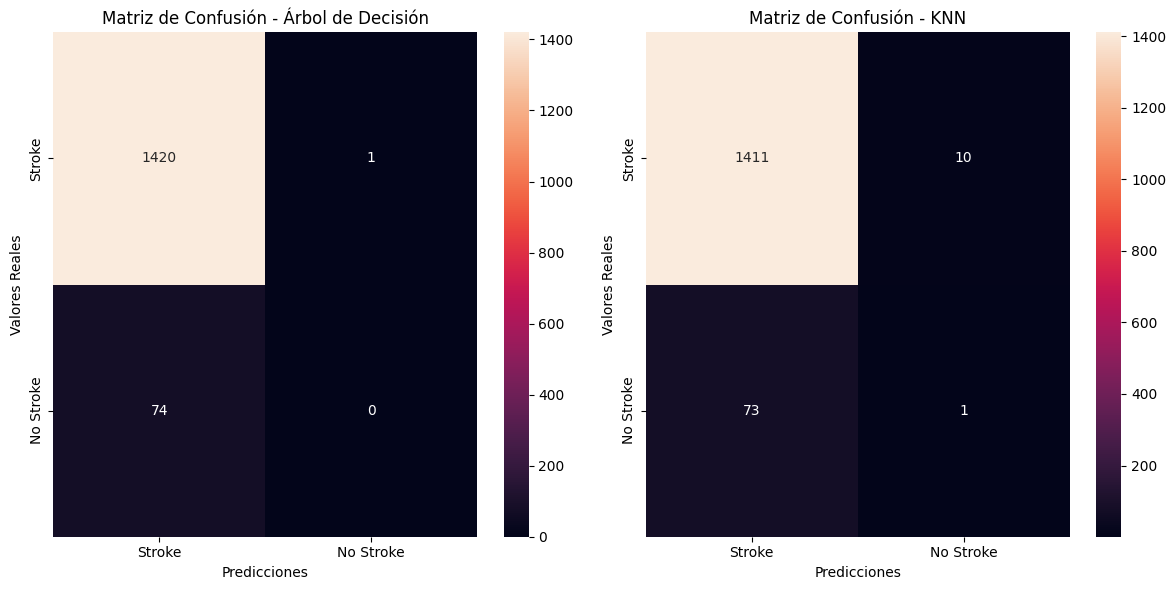

In [26]:
# Matriz de Confusión para el Árbol de Decisión
cm_tree = confusion_matrix(y_testset, predTree)

# Matriz de Confusión para KNN
cm_knn = confusion_matrix(y_testset, prediction2)

# Configurar la visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica del Árbol de Decisión
sns.heatmap(cm_tree, annot=True, fmt="d", xticklabels=['Stroke', 'No Stroke'], yticklabels=['Stroke', 'No Stroke'], ax=axes[0])
axes[0].set_title('Matriz de Confusión - Árbol de Decisión')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')

# Gráfica de KNN
sns.heatmap(cm_knn, annot=True, fmt="d", xticklabels=['Stroke', 'No Stroke'], yticklabels=['Stroke', 'No Stroke'], ax=axes[1])
axes[1].set_title('Matriz de Confusión - KNN')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')

plt.tight_layout()
plt.show()


In [27]:
#metricas de rendimiento
from sklearn.metrics import classification_report
print(classification_report(y_testset, predTree))
print(classification_report(y_testset, prediction2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.90      0.95      0.93      1495

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1421
           1       0.09      0.01      0.02        74

    accuracy                           0.94      1495
   macro avg       0.52      0.50      0.50      1495
weighted avg       0.91      0.94      0.92      1495



AUC Arbol de Decision: 0.82
AUC KNN: 0.67


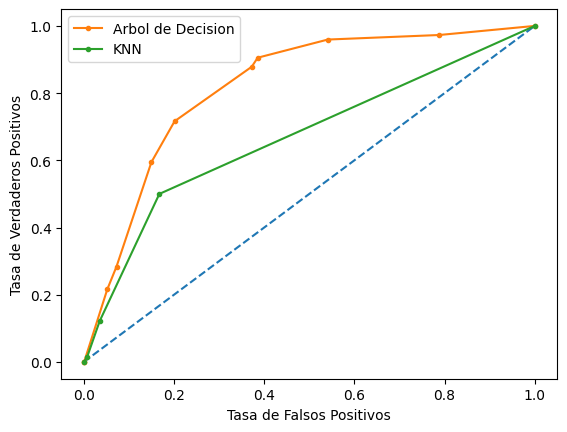

In [39]:
#graficar curva roc para arbol de decision y knn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calcular probabilidades
probs_tree = classTree.predict_proba(X_testset)
probs_knn = model.predict_proba(X_testset)

# Mantener solo las probabilidades positivas
probs_tree = probs_tree[:, 1]
probs_knn = probs_knn[:, 1]

# Calcular AUC
auc_tree = roc_auc_score(y_testset, probs_tree)
auc_knn = roc_auc_score(y_testset, probs_knn)

# Imprimir resultados
print('AUC Arbol de Decision: %.2f' % auc_tree)
print('AUC KNN: %.2f' % auc_knn)

# Calcular curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_testset, probs_tree)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_testset, probs_knn)

# Graficar curva ROC
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tree, tpr_tree, marker='.', label='Arbol de Decision')
plt.plot(fpr_knn, tpr_knn, marker='.', label='KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()